# PyZeta Teaser

## Imports

In [9]:
from typing import Final

import numpy as np
import matplotlib.pyplot as plt

from pyzeal.rootfinders.rootfinder import RootFinder
from pyzeal.pyzeal_types.algorithm_types import AlgorithmTypes
from pyzeal.pyzeal_types.estimator_types import EstimatorTypes
from pyzeal.settings.json_settings_service import JSONSettingsService

from pyzeta.core.pyzeta_types.function_systems import FunctionSystemType
from pyzeta.core.pyzeta_types.map_systems import MapSystemType

from pyzeta.framework.initialization.initialization_handler import (
    PyZetaInitializationHandler,
)
from pyzeta.core.zetas.selberg_zeta import SelbergZeta
from pyzeta.core.pyzeta_types.integrals import OrbitIntegralType
from pyzeta.core.zetas.wzeta import WeightedZeta

PyZetaInitializationHandler.initPyZetaServices()
# deactivate PyZEAL progress bar
JSONSettingsService().verbose = False


## Hyperbolic Cylinder Resonances

resonance=1.885j --> order=2
resonance=-0j --> order=2
resonance=0.628j --> order=2
resonance=1.256j --> order=2
resonance=1.885j --> order=2
resonance=-0j --> order=2
resonance=0.628j --> order=2
resonance=1.256j --> order=2


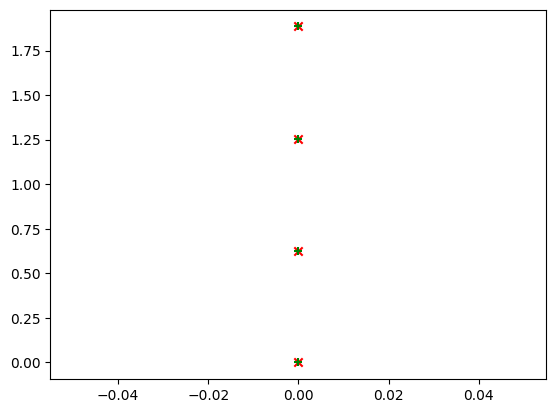

In [2]:
# calculate quantum resonances for Schottky and flow adapted cylinders
initArgs = {"funnelWidth": 10.0, "rotate": False}
width = initArgs["funnelWidth"]
nMax = 10

for systemType, color, marker in zip(
    [
        FunctionSystemType.FLOW_CYLINDER,
        FunctionSystemType.HYPERBOLIC_CYLINDER,
    ],
    ["red", "green"],
    ["x", "+"],
):
    zeta = SelbergZeta(
        functionSystem=systemType,
        systemInitArgs=initArgs,
    )

    finder = RootFinder(
        f=lambda s: zeta(s, nMax=nMax),
        algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
        estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
    )

    finder.calculateRoots(
        reRan=(-0.4, 0.5), imRan=(-0.1, 2.2), precision=(3, 2)
    )
    for res, order in zip(finder.roots, finder.orders):
        print(f"resonance={res} --> order={order}")

    plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)


resonance=(-1+1.256j) --> order=2
resonance=(-1-0j) --> order=2
resonance=(-1+0.628j) --> order=2
resonance=(-1+1.885j) --> order=2
resonance=(-1+1.256j) --> order=2
resonance=(-1-0j) --> order=2
resonance=(-1+0.628j) --> order=2
resonance=(-1+1.885j) --> order=2


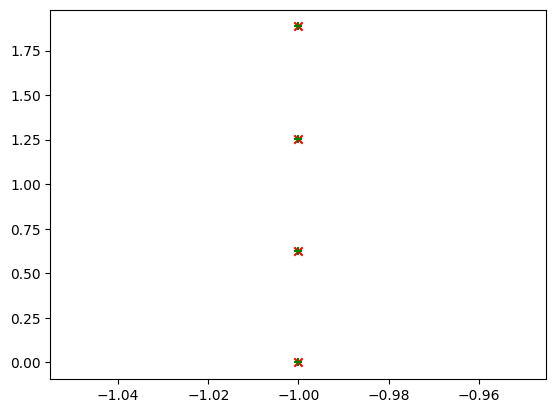

In [6]:
# calculate classical resonances for Schottky and flow adapted cylinders
initArgs = {"funnelWidth": 10.0}
width = initArgs["funnelWidth"]
nMax = 10

for systemType, color, marker in zip(
    [
        MapSystemType.HYPERBOLIC_CYLINDER,
        MapSystemType.FLOW_CYLINDER,
    ],
    ["red", "green"],
    ["x", "+"],
):
    wzeta = WeightedZeta(
        mapSystem=systemType,
        systemInitArgs=initArgs,
        integralType=OrbitIntegralType.CONSTANT,
        integralInitArgs={},
    )

    finder = RootFinder(
        f=lambda s: wzeta(s, nMax=nMax),
        algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
        estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
    )

    finder.calculateRoots(
        reRan=(-1.4, -0.5), imRan=(-0.1, 2.2), precision=(3, 2)
    )
    for res, order in zip(finder.roots, finder.orders):
        print(f"resonance={res} --> order={order}")

    plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)


## Funneled Torus Resonances

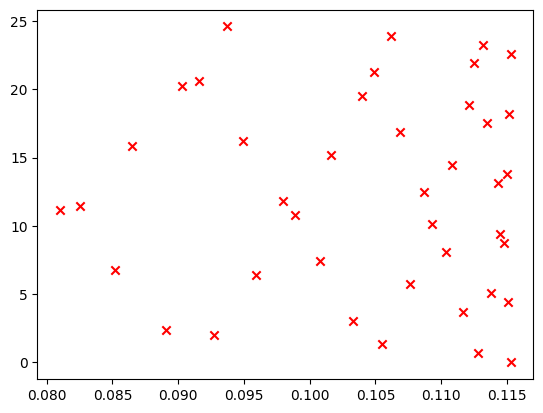

In [7]:
# calculate quantum resonances for non-geometric torus coordinate choice
initArgs = {"outerLen": 10.0, "innerLen": 10.0, "angle": np.pi / 2.0}
nMax = 6

systemType = FunctionSystemType.FUNNEL_TORUS
color = "red"
marker = "x"

zeta = SelbergZeta(
    functionSystem=systemType,
    systemInitArgs=initArgs,
)

finder = RootFinder(
    f=lambda s: zeta(s, nMax=nMax),
    algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
    estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
)

finder.calculateRoots(reRan=(0.08, 0.12), imRan=(-0.0, 25.0), precision=(3, 2))

plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)

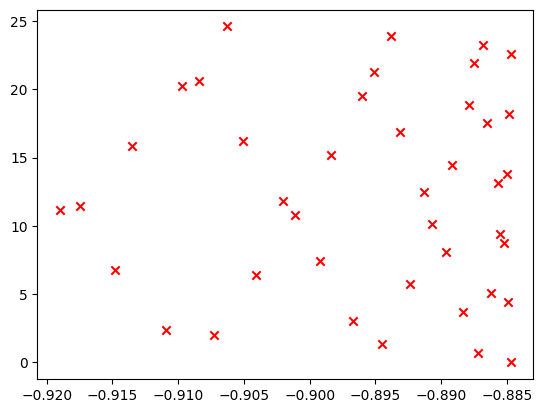

In [8]:
# calculate classical resonances for non-geometric torus coordinate choice
initArgs = {"outerLen": 10.0, "innerLen": 10.0, "angle": np.pi / 2.0}
nMax = 6

systemType = MapSystemType.FUNNEL_TORUS
color = "red"
marker = "x"

zeta = WeightedZeta(
    mapSystem=systemType,
    systemInitArgs=initArgs,
    integralType=OrbitIntegralType.CONSTANT,
    integralInitArgs={},
)

finder = RootFinder(
    f=lambda s: zeta(s, nMax=nMax),
    algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
    estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
)

finder.calculateRoots(
    reRan=(-0.92, -0.88), imRan=(-0.0, 25.0), precision=(3, 2)
)

plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)

## Hyperbolic Cylinder Ruelle Distributions

In [10]:
# calculate Ruelle dist at delta-1 for Schottky and flow-adapted systems
# (plot Poincare section and fundamental domain side-by-side)
FIRST_RESONANCE: Final[complex] = -1.0 + 0.0j


## Funneled Torus Ruelle Distributions

In [6]:
# calculate Ruelle distributions at delta-1 for both coordinate choices
# plot Poincare section and fundamental domain side-by-side
